In [19]:
# previously recorded values from the reconnaissance run of dcraw
black = 2044
white = 16383
r_scale = 2.165039
g_scale = 1.0
b_scale = 1.643555

## python initials
here, we use skimage's imread to get read the image and obtain values

In [20]:
import numpy as np
from skimage.io import imread

image = imread("../../../data/Thayer.tiff").astype(np.float32)
print("height, width:", image.shape, "as type", image.dtype)
print("bits per pixel:", image.itemsize * 8)

height, width: (4016, 6020) as type float32
bits per pixel: 32


we can then convert this image into a double-precision array

In [21]:
image = image.astype(np.float64)
print("bits per pixel:", image.itemsize * 8)

bits per pixel: 64


## linearization
we can apply a linear transformation to the image so that the value \<black> is mapped to 0, and the value \<white> is mapped to 1. we then clip the negative values to 0, and values greater than 1 to 1

In [22]:
print("original min/max value:", image.min(), image.max())

image = (image - (black)) / (white - black)     # shift min to 0
print("post transformation min/max value:", image.min(), image.max())

image = np.clip(image, 0, 1)  # clip to [0, 1]
print("post clip min/max value:", image.min(), image.max())

original min/max value: 255.0 15305.0
post transformation min/max value: -0.12476462793779204 0.9248204198340191
post clip min/max value: 0.0 0.9248204198340191


## identifying the correct bayer pattern
we can begin by choosing a random bayer pattern to test for, beginning with rggb

Matplotlib is building the font cache; this may take a moment.


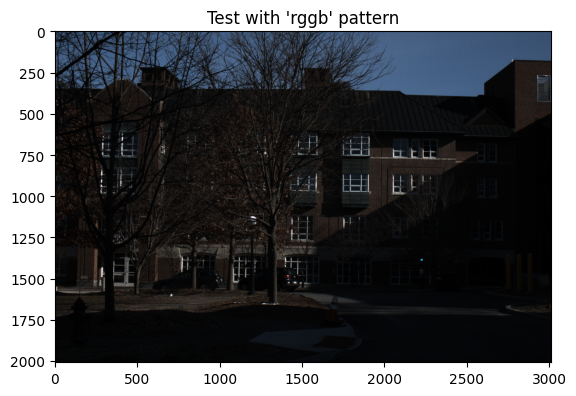

In [23]:
import matplotlib.pyplot as plt

# 1. Separate channels based on the 'rggb' pattern guess
red_channel = image[0::2, 0::2]
green_channel1 = image[0::2, 1::2]
green_channel2 = image[1::2, 0::2]
blue_channel = image[1::2, 1::2]

# It's common to average the two green channels
green_channel = (green_channel1 + green_channel2) / 2

# 2. Apply white balancing using your recorded values
red_channel = red_channel * r_scale
# g_scale is 1.0, so no change needed for green
blue_channel = blue_channel * b_scale

# 3. Create the temporary RGB image for viewing
# The PDF hints at using np.dstack for this [cite: 259]
rgb_test_image = np.dstack((red_channel, green_channel, blue_channel))

# 4. Clip values to be safe for viewing
rgb_test_image = np.clip(rgb_test_image, 0, 1)

# 5. Display the result (e.g., using matplotlib)
plt.imshow(rgb_test_image)
plt.title("Test with 'rggb' pattern")
plt.show()